In [1]:
import pandas as pd
from conceptualDesign.conceptualDesign import conceptualDesign
from misc.openData import openData
from misc.materials import load_materials
import matplotlib.pyplot as plt
import numpy as np

In [2]:
material_data: dict = load_materials()
iters = 1000

fuelMassLst = []
for i in range(1000000, 3000000, 100000):
    

    parameters = openData("design1")
    parameters["flightRange"] = i
    params, df = conceptualDesign(parameters, material_data, iters)
    fuelMassLst.append(params["fuelMass"])
    
plt.plot(np.arange(1000000, 3000000, 100000), fuelMassLst)

 11%|███████████████▋                                                                                                                                 | 108/1000 [00:01<00:08, 99.92it/s]


KeyboardInterrupt: 

In [2]:
parameters = openData("design1")
material_data: dict = load_materials()
iters = 1000
params, df = conceptualDesign(parameters, material_data, iters)
df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonStructuralMass", "balloonVolume"]]

  2%|███▍                                                                                                                                             | 24/1000 [00:00<00:09, 101.28it/s]


,fuelMass,balloonStructuralMass,balloonVolume
0,9.110945,5574.420386,20.480133
1,8.220426,50788.236407,186.593362
2,11.007201,45824.108888,168.355413
3,11.529651,61358.763928,225.428935
4,12.758718,64271.123039,236.128792
5,13.338295,71122.455874,261.300235
6,13.989104,74353.266144,273.170066
7,14.412676,77981.146241,286.498710
8,14.793652,80342.313492,295.173517
9,15.074242,82466.035802,302.975963


In [3]:
parameters = openData("design1")
material_data: dict = load_materials()
iters = 1000
params, df = conceptualDesign(parameters, material_data, iters)
df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass", "balloonLift", "liftRatio", "balloonLength", "balloonArea", "wingArea", "fuselageStructuralMass", "totalDrag", "balloonStructuralMass"]]

  2%|███▏                                                                                                                                             | 22/1000 [00:00<00:09, 104.31it/s]/Users/sasha/Documents/code/repos/AE3200DSE/conceptualDesign/fuselageSizing.py:78: RuntimeWarning: overflow encountered in double_scalars
  KWS = 0.75 * ((1+2*labda)/(1+labda)*(AR*Sref)**2*np.tan(c4))/lfus  # [?]
/Users/sasha/Documents/code/repos/AE3200DSE/conceptualDesign/fuselageSizing.py:78: RuntimeWarning: invalid value encountered in double_scalars
  KWS = 0.75 * ((1+2*labda)/(1+labda)*(AR*Sref)**2*np.tan(c4))/lfus  # [?]
  3%|████                                                                                                                                             | 28/1000 [00:00<00:09, 103.90it/s]

Diverged


,fuelMass,balloonVolume,requiredEnergy,totalMass,balloonLift,liftRatio,balloonLength,balloonArea,wingArea,fuselageStructuralMass,totalDrag,balloonStructuralMass
0,9.110945e+01,2.048013e+01,1.102060e+10,9.736702e+04,1.896181e+02,1.985175e-04,1.050397e+01,1.949752e+00,1.504025e+02,1.539947e+04,6.142882e+04,5.574420e+03
1,1.184130e+02,1.865934e+03,1.432323e+10,5.945632e+05,1.727600e+04,2.961939e-03,4.726517e+01,3.947798e+01,1.183379e+02,1.378385e+04,7.983770e+04,5.078824e+05
2,4.822898e+02,2.425113e+03,5.833777e+10,8.810695e+05,2.245324e+04,2.597765e-03,5.158062e+01,4.701598e+01,7.331016e+02,3.406149e+04,3.251748e+05,6.600837e+05
3,7.621975e+02,9.877359e+03,9.219541e+10,3.001112e+06,9.145085e+04,3.106251e-03,8.237387e+01,1.199089e+02,1.079023e+03,4.146385e+04,5.138972e+05,2.688486e+06
4,2.303317e+03,1.560991e+04,2.786092e+11,5.443717e+06,1.445264e+05,2.706342e-03,9.594948e+01,1.626888e+02,3.696460e+03,7.652542e+04,1.552968e+06,4.248810e+06
5,4.186215e+03,4.717223e+04,5.063646e+11,1.532591e+07,4.367505e+05,2.904947e-03,1.387197e+02,3.400544e+02,6.682971e+03,1.030653e+05,2.822476e+06,1.283966e+07
6,1.124969e+04,8.573425e+04,1.360762e+12,3.284418e+07,7.937820e+05,2.463621e-03,1.692884e+02,5.064389e+02,1.886984e+04,1.729329e+05,7.584888e+06,2.333572e+07
7,2.383275e+04,2.303951e+05,2.882810e+12,8.879538e+07,2.133144e+06,2.448842e-03,2.353605e+02,9.789029e+02,4.038447e+04,2.531592e+05,1.606878e+07,6.271048e+07
8,6.311105e+04,4.880979e+05,7.633913e+12,2.321090e+08,4.519120e+06,1.984691e-03,3.022815e+02,1.614713e+03,1.093383e+05,4.162553e+05,4.255143e+07,1.328538e+08
9,1.630064e+05,1.292523e+06,1.971725e+13,7.156224e+08,1.196700e+07,1.704638e-03,4.182044e+02,3.090648e+03,2.857883e+05,6.729930e+05,1.099039e+08,3.518075e+08


In [6]:
df[['payloadMass', 'altitude', 'velocity', 'flightRange',
       'compressionRatio', 'balloonFinesseRatio', 
       'safetyFactor', 'propEfficiency', 'engineEfficiency',
       'fuelCellEfficiency', 'engineSpecificPower', 'fuelCellSpecificPower',
       'wingAlpha', 'wingC_L_alpha', 'liftFactor', 'wingC_D_0', 'wingC_D',
       'wingAspectRatio', 'wingDragCorrection', 'maxLoadFactor',
       'thicknessOverChord', 'wingQuarterChordSweep', 'wingHalfChordSweep',
       'wingTaperRatio', 'fuselageStructuralMass', 'wingStructuralMass',
       'balloonStructuralMass', 'fuelMass', 'liftingHydrogenMass',
       'propulsionMass', 'totalMass', 'balloonC_D', 'fuselageC_D',
       'wingC_L_design', 'fuselageArea', 'wingArea','requiredEnergy', 'totalDrag', 'balloonVolume']]

,payloadMass,altitude,velocity,flightRange,compressionRatio,balloonFinesseRatio,safetyFactor,propEfficiency,engineEfficiency,fuelCellEfficiency,...,propulsionMass,totalMass,balloonC_D,fuselageC_D,wingC_L_design,fuselageArea,wingArea,requiredEnergy,totalDrag,balloonVolume
0,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,1.284992e+03,1.062725e+05,0.035,0.295,0.8,39.896974,4.052716e+02,2.684163e+11,5.984609e+04,6.284368e-01
1,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,1.365156e+03,1.737887e+05,0.035,0.295,0.8,39.896974,3.543928e+02,2.851613e+11,6.357957e+04,1.394532e+03
2,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,2.080445e+03,2.051146e+05,0.035,0.295,0.8,39.896974,5.795426e+02,4.345747e+11,9.689278e+04,1.481530e+03
3,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,2.482754e+03,2.589699e+05,0.035,0.295,0.8,39.896974,6.840069e+02,5.186114e+11,1.156296e+05,2.257794e+03
4,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,3.081834e+03,3.054594e+05,0.035,0.295,0.8,39.896974,8.636010e+02,6.437503e+11,1.435306e+05,2.694398e+03
5,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,3.618086e+03,3.608254e+05,0.035,0.295,0.8,39.896974,1.018632e+03,7.557656e+11,1.685055e+05,3.344547e+03
6,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,4.237259e+03,4.177069e+05,0.035,0.295,0.8,39.896974,1.203264e+03,8.851019e+11,1.973423e+05,3.926512e+03
7,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,4.875385e+03,4.810899e+05,0.035,0.295,0.8,39.896974,1.392950e+03,1.018397e+12,2.270618e+05,4.598467e+03
8,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,5.579108e+03,5.499524e+05,0.035,0.295,0.8,39.896974,1.604317e+03,1.165395e+12,2.598364e+05,5.290990e+03
9,60000.0,10000.0,140.0,2500000.0,20.0,10.0,1.4,0.5574,0.929,0.6,...,6.341171e+03,6.266686e+05,0.035,0.295,0.8,39.896974,1.833956e+03,1.324579e+12,2.953281e+05,6.054704e+03


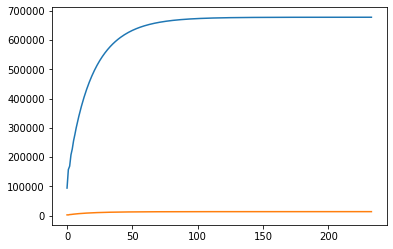

In [4]:
plt.plot(df.index, df.totalMass, df.fuelMass)